In [1]:
import os
import numpy as np
import rasterio
import rasterio.plot
import matplotlib.pyplot as plt
import cv2
import glob
from shapely.geometry import shape
from shapely.geometry.polygon import Polygon
import tqdm
from microsoft_planetarycomputer_download.utils import read_geojson
from utils.rasterio_utils import reproject_raster, mask_raster_by_shapely, save_raster_preview_as_png

In [2]:
files = glob.glob('/data/microsoft_planetary_computer/naip/*/mosaic/mosaic.tiff')

m = np.zeros(4)
s = np.zeros(4)
for f in files:
    with rasterio.open(f, 'r') as src:
        print(src.profile)
        img = src.read().transpose(1, 2, 0)
        m += np.mean(img, axis=(0, 1)).squeeze()
        s += np.std(img, axis=(0, 1)).squeeze()
        print(f)
        x = np.mean(img, axis=(0, 1)).squeeze() 
        y = np.std(img, axis=(0, 1)).squeeze()

        print('--mean {} {} {} {}'.format(*x[:3] / 255, x[3] / 255))
        print('--std {} {} {} {}'.format(*y[:3] / 255, y[3] / 255))
        print()

x = m / len(files)
y = s / len(files)
print('--mean {} {} {} {}'.format(*x[:3] / 255, x[3] / 255))
print('--std {} {} {} {}'.format(*y[:3] / 255, y[3] / 255))

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 39470, 'height': 35940, 'count': 4, 'crs': CRS.from_epsg(26911), 'transform': Affine(0.6, 0.0, 339012.0,
       0.0, -0.6, 3833052.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
/data/microsoft_planetary_computer/naip/castaic_lake/mosaic/mosaic.tiff
--mean 0.4268476833798482 0.42497365668226966 0.35172783889354553 0.4990250568441509
--std 0.1636315965849512 0.13209064646733282 0.12794689844683432 0.13135752653579388

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 28980, 'height': 35560, 'count': 4, 'crs': CRS.from_epsg(26918), 'transform': Affine(0.6, 0.0, 420996.0,
       0.0, -0.6, 4012236.0), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}
/data/microsoft_planetary_computer/naip/duck/mosaic/mosaic.tiff
--mean 0.3257844302238374 0.34139683228839485 0.30508054475166 0.3157185638681658
--std 0.22247320771710805 0.21060038603928913 0.18978872896910837 0.3011442809967048

{'driver': 'GTiff

In [2]:
def change_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v,value)
    v[v > 255] = 255
    v[v < 0] = 0
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [3]:
data = glob.glob('/data/microsoft_planetary_computer/planet/*/mosaic/mosaic.tiff')

img_data = []
for p in data:
    with rasterio.open(p) as src:
        img = src.read().transpose(1, 2, 0)
        img_data.append(img[:,:,0:3].reshape(-1, 3))

img = np.vstack(img_data) / 255

In [4]:
np.mean(img, axis=0), np.std(img, axis=0)

(array([0.40557026, 0.33752207, 0.32512365]),
 array([0.23962583, 0.17332   , 0.14563934]))

uint8
[0.3590033  0.37653159 0.33558006 0.35559756] [0.2068465  0.19294375 0.17554244 0.29556478]


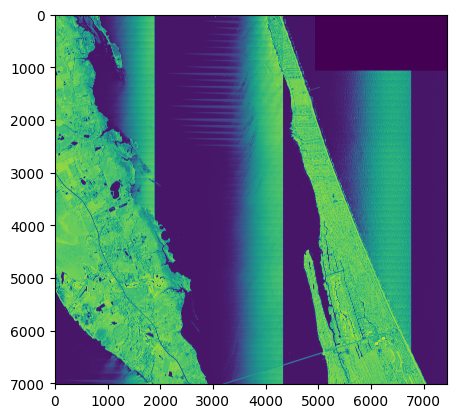

In [22]:
# t = '/data/microsoft_planetary_computer/planet/castaic_lake/mosaic/mosaic.tiff'
t = '/data/microsoft_planetary_computer/planet/castaic_lake/4band/composite.tif'
t = '/data/microsoft_planetary_computer/outputs/preprocessed/epsg-32618/duck/naip/2.0/mosaic.tiff'

# t = '/data/microsoft_planetary_computer/planet/duck/4band/composite.tif'

with rasterio.open(t) as src:
    dsm = src.read().transpose(1, 2, 0)
    # plt.figure()
    # plt.hist(dsm[:,:,0].ravel(), bins=256)
    # plt.show()
    # print(dsm.shape)
    # dsm = dsm - np.percentile(dsm, 0, axis=(0, 1), keepdims=True)
    # dsm = dsm / np.percentile(dsm, 98, axis=(0, 1), keepdims=True)
    # dsm = np.uint8(np.clip(dsm, 0, 1)*255)
    # m = np.percentile(dsm[:,:,0:3], 99)
    # plt.imshow(cv2.cvtColor(dsm[:,:,0:3], cv2.COLOR_BGR2RGB) / m)
    plt.imshow(dsm[:,:,3])
    # plt.hist(dsm[:,:,3].ravel() / 255, bins=256)
    print(dsm.dtype)
    mean, std = np.mean(dsm[:,:,0:4], axis=(0, 1)), np.std(dsm[:,:,0:4], axis=(0, 1))
    print(mean / 255, std / 255)
    # rasterio.plot.show(src, transform=src.transform)


[0.00604845 0.0075466  0.00811477 0.08573719] [0.00392261 0.00271905 0.00238826 0.10756605]


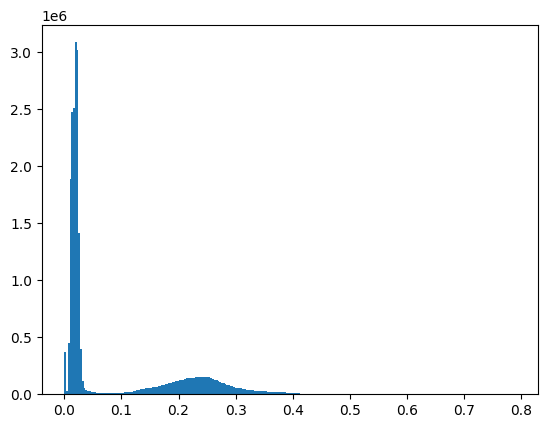

In [45]:
# t = '/data/microsoft_planetary_computer/planet/duck/4band/composite.tif'
t = '/data/microsoft_planetary_computer/planet/duck/mosaic/mosaic.tiff'

with rasterio.open(t) as src:
    dsm = src.read().transpose(1, 2, 0)
    m = np.percentile(dsm[:,:,0:3], 99)
    # plt.imshow(cv2.cvtColor(dsm[:,:,0:3], cv2.COLOR_BGR2RGB) / m)
    # plt.imshow(dsm[:,:,3])
    plt.hist(dsm[:,:,3].ravel() / 1e4, bins=256)
    # rasterio.plot.show(src, transform=src.transform)
    mean, std = np.mean(dsm[:,:,0:4], axis=(0, 1)), np.std(dsm[:,:,0:4], axis=(0, 1))
    print(mean / 10000, std / 10000)

In [14]:
a = (dsm - mean) / std
b = a[:,:,3] * 0.29 + 0.35

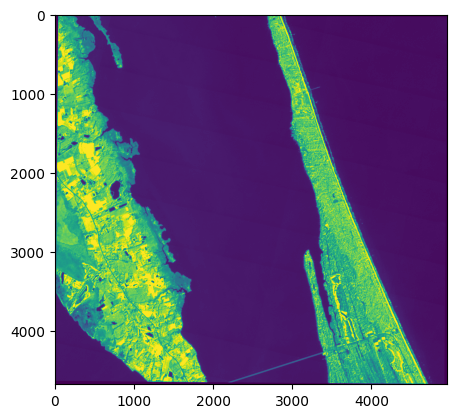

In [21]:
# plt.hist(b.ravel(), bins=256)
plt.imshow(np.clip(b, 0, 1))

In [70]:
dsm = '/data/chesapeake_bay_lulc/outputs/preprocessed/epsg-32618/virginia_beach_false_cape_landing/dsm/2.0/mosaic.tiff'
dem_1m = '/data/chesapeake_bay_lulc/outputs/preprocessed/epsg-32618/virginia_beach_false_cape_landing/dem/2.0/mosaic.tiff'

In [71]:
with rasterio.open(dsm) as src:
    dsm = src.read()

with rasterio.open(dem_1m) as src:
    dem = src.read()
    print(src.meta)

print(dsm.shape, dem.shape, dem.dtype)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -999999.0, 'width': 4971, 'height': 8151, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(2.0, 0.0, 414718.24472916755,
       0.0, -2.0, 4063451.84280604)}
(1, 8151, 4971) (1, 8151, 4971) float32


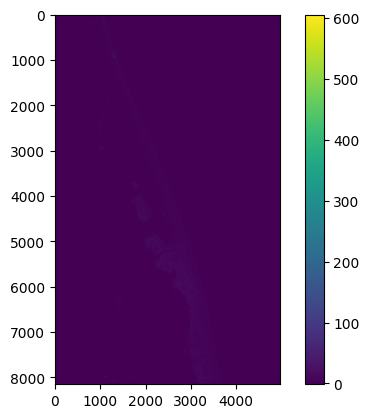

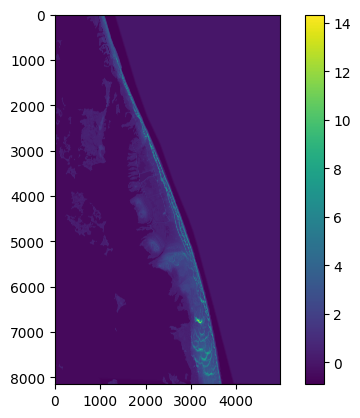

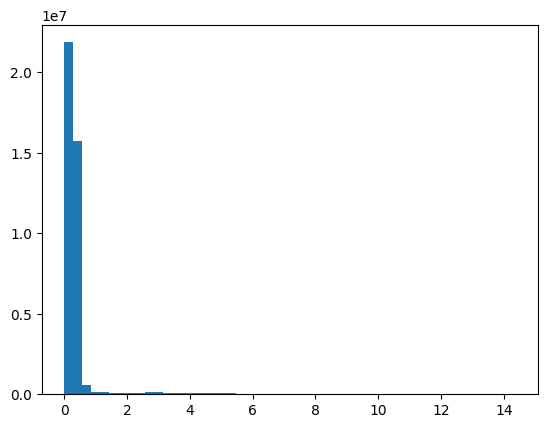

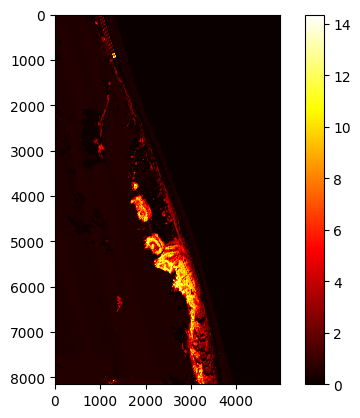

In [72]:
import matplotlib.pyplot as plt

dsm[dsm <= -9999] = 0
dem[dem <= -9999] = 0
print()
# dsm = np.clip(dsm, 0, 100)
plt.figure()
plt.imshow(dsm[0])
plt.colorbar()
plt.show()

# dem = np.clip(dem, 0, None)
plt.figure()
plt.imshow(dem[0])
plt.colorbar()
plt.show()

diff = dsm - dem
diff = np.clip(diff, 0, np.percentile(diff, 99.9))
plt.figure()
plt.hist(diff[0].flatten(), bins=50)
plt.show() 

plt.figure()
plt.imshow(diff[0], cmap='hot')
plt.colorbar()
plt.show()

In [2]:
def plot_and_info(path):
    with rasterio.open(path, 'r') as x:
        print(x.res, x.crs, x.nodata, x.crs.linear_units)
        rasterio.plot.show(x)

In [3]:
# plot_and_info('/data/chesapeake_bay_lulc/raw_tifs/lc/clin_42035_landcover_2013.tif')
# plot_and_info('/data/chesapeake_bay_lulc/chesapeake_data/de_1m_2013_extended-train_tiles/m_3807513_nw_18_1_naip-old.tif')

# plot_and_info('/data/chesapeake_bay_lulc/chesapeake_data/de_1m_2013_extended-train_tiles/m_3807523_ne_18_1_lc.tif')
# plot_and_info('/data/chesapeake_bay_lulc/chesapeake_data/de_1m_2013_extended-train_tiles/m_3807523_ne_18_1_nlcd.tif')

# plot_and_info('/data/chesapeake_bay_lulc/chesapeake_data/de_1m_2013_extended-train_tiles/m_3807523_sw_18_1_landsat-leaf-on.tif')


In [6]:
data_dir = '/data/chesapeake_bay_lulc/'

# replace for virginia_beach geojsons
geojson_filepath = '/home/connor/repos/aerial-auto-segment/geojsons/clinton.geojson'
# replace for virginia_beach label rasters
label_raster = '/data/chesapeake_bay_lulc/raw_tifs/lc/clin_42035_landcover_2017.tif'

save_dir = os.path.join(data_dir, 'chesapeake_bay_lc', os.path.basename(geojson_filepath).split('.')[0], 'mosaic')
bounds = Polygon(shape(read_geojson(geojson_filepath)['geometry']))

reprojected_label_raster = label_raster.replace('.tif', '_epsg4326.tif')
final_mosaic_path = os.path.join(save_dir, 'mosaic.tiff')

with rasterio.open(label_raster, 'r') as x:
    original_crs = x.crs

os.makedirs(save_dir, exist_ok=True)
reproject_raster(label_raster, reprojected_label_raster, 'EPSG:4326')
mask_raster_by_shapely(reprojected_label_raster, final_mosaic_path, bounds)
reproject_raster(final_mosaic_path, final_mosaic_path, original_crs)
save_raster_preview_as_png(final_mosaic_path, chesapeake_bay=True)